#Web Scraping / Data Collection

##Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [ ]:
reviews  = []

stars = []

date = []

country = []

In [ ]:
pages = 10
page_size = 100

for i in range(1, pages+1):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

In [ ]:
len(stars)

110

In [ ]:
len(reviews)

100

In [ ]:
len(country)

100

In [ ]:
len(country)

100

In [ ]:
len(stars)

110

In [ ]:
len(date)

100

In [ ]:
stars = stars[:100]

In [ ]:
df = pd.DataFrame({"reviews": reviews, "stars": stars, "date": date, "country": country})

In [ ]:
df

,reviews,stars,date,country
0,Not Verified | British Airways has confirmed ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,16th September 2023,United Kingdom
1,✅ Trip Verified | Worst BA experience. I was s...,1,15th September 2023,South Africa
2,✅ Trip Verified | My daughter and I were deni...,2,13th September 2023,Canada
3,✅ Trip Verified | Despite boarding being the u...,1,11th September 2023,United Kingdom
4,"Not Verified | Flight cancelled, no crew! 9th...",8,10th September 2023,United Kingdom
...,...,...,...,...
95,"Not Verified | The worst service ever, my bag...",1,9th September 2023,Kuwait
96,✅ Trip Verified | 4/4 flights we booked this ...,1,6th September 2023,Germany
97,✅ Trip Verified | British Airways has a total...,8,4th September 2023,United Kingdom
98,"✅ Trip Verified | London Heathrow to Keflavik,...",8,4th September 2023,Iceland


In [ ]:
path = "/content/sample_data/britishairways"
df.to_csv(path, index=False)

#Data Cleaning / Manipulation & EDA


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [ ]:
dt = pd.read_csv("/content/sample_data/britishairways")
dt

,reviews,stars,date,country
0,Not Verified | British Airways has confirmed ...,5,16th September 2023,United Kingdom
1,✅ Trip Verified | Worst BA experience. I was s...,1,15th September 2023,South Africa
2,✅ Trip Verified | My daughter and I were deni...,2,13th September 2023,Canada
3,✅ Trip Verified | Despite boarding being the u...,1,11th September 2023,United Kingdom
4,"Not Verified | Flight cancelled, no crew! 9th...",8,10th September 2023,United Kingdom
...,...,...,...,...
95,"Not Verified | The worst service ever, my bag...",1,9th September 2023,Kuwait
96,✅ Trip Verified | 4/4 flights we booked this ...,1,6th September 2023,Germany
97,✅ Trip Verified | British Airways has a total...,8,4th September 2023,United Kingdom
98,"✅ Trip Verified | London Heathrow to Keflavik,...",8,4th September 2023,Iceland


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  100 non-null    object
 1   stars    100 non-null    int64 
 2   date     100 non-null    object
 3   country  100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [ ]:
dt['Verified'] = dt.reviews.str.contains("Trip Verified")
dt['Verified'].value_counts()

True     70
False    30
Name: Verified, dtype: int64

~70% Trips are verified hence the reviews can be considered genuine.

In [ ]:
dt['stars'] = dt['stars'].replace(8, 4) #Make scale of 1-5
dt['stars'].value_counts()

1    54
4    27
5    10
2     9
Name: stars, dtype: int64

##Average ratings of British Airways


In [ ]:
dt.stars.mean()

2.3

Below Average service

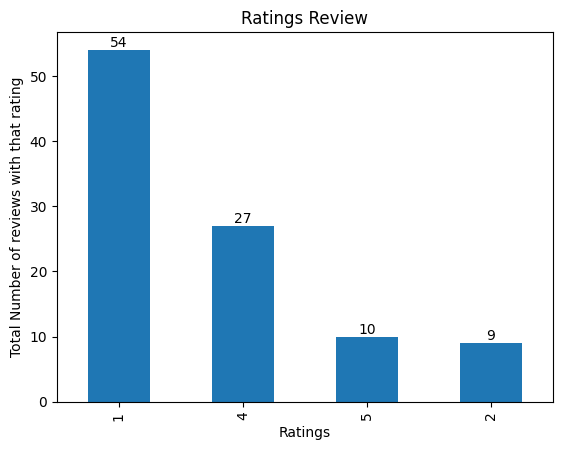

In [ ]:
value_counts = dt['stars'].value_counts()
ax = value_counts.plot(kind="bar")

plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.title("Ratings Review")
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

In [ ]:
country = dt['country'].value_counts()
country

United Kingdom    40
Iceland           20
South Africa      10
Canada            10
Kuwait            10
Germany           10
Name: country, dtype: int64

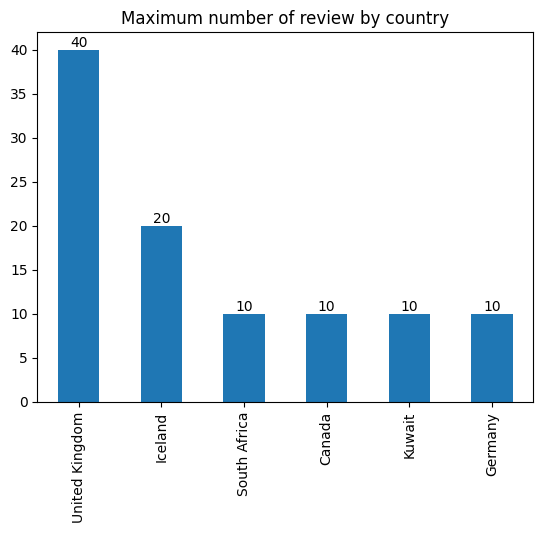

In [ ]:
ax1 = country.plot(kind="bar")
country.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

for i, v in enumerate(country):
    ax1.text(i, v, str(v), ha='center', va='bottom')

Countrywise rating

In [ ]:
dt['reviews']

0     Not Verified |  British Airways has confirmed ...
1     ✅ Trip Verified | Worst BA experience. I was s...
2     ✅ Trip Verified |  My daughter and I were deni...
3     ✅ Trip Verified | Despite boarding being the u...
4     Not Verified |  Flight cancelled, no crew! 9th...
                            ...                        
95    Not Verified |  The worst service ever, my bag...
96    ✅ Trip Verified |  4/4 flights we booked this ...
97    ✅ Trip Verified |  British Airways has a total...
98    ✅ Trip Verified | London Heathrow to Keflavik,...
99    ✅ Trip Verified | Mumbai to London Heathrow in...
Name: reviews, Length: 100, dtype: object

In [ ]:
dt['description'] = dt['reviews'].str.replace('✅', '').str.replace('Trip Verified', '').str.replace('|', '').str.replace('Not Verified', '')
dt['description'] = pd.DataFrame(dt['description'])
dt['description']

<ipython-input-39-9c0a73fd86c4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dt['description'] = dt['reviews'].str.replace('✅', '').str.replace('Trip Verified', '').str.replace('|', '').str.replace('Not Verified', '')


0        British Airways has confirmed itself as the...
1        Worst BA experience. I was supposed to fly ...
2         My daughter and I were denied boarding on ...
3        Despite boarding being the usual free for a...
4        Flight cancelled, no crew! 9th September 20...
                            ...                        
95       The worst service ever, my baggage did not ...
96        4/4 flights we booked this holiday were de...
97        British Airways has a total lack of respec...
98       London Heathrow to Keflavik, Iceland in Bus...
99       Mumbai to London Heathrow in Business Class...
Name: description, Length: 100, dtype: object

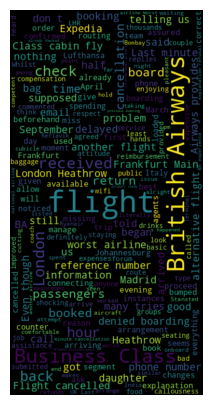

In [ ]:
from wordcloud import WordCloud

text_data = " ".join(dt['description'])

wordcloud = WordCloud(width=400, height=800, background_color="black").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Buzzwords in our dataset are higlighted in above wordcloud, but it doesnot infer much as it does not sound positive or negative.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the NLTK tokenizer data if not already downloaded

# Tokenize the text data into words
words = word_tokenize(text_data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from collections import Counter

# Create a Counter object to count word frequencies
word_counter = Counter(words)

# Get the most common words and their counts (e.g., top 25)
most_common_words = word_counter.most_common(50)

# Print the most common words and their counts
for word, count in most_common_words:
    print(f"{word}: {count}")

.: 860
the: 630
,: 560
to: 560
and: 400
I: 340
was: 320
on: 300
flight: 200
of: 190
my: 180
a: 180
that: 170
BA: 160
had: 160
in: 150
at: 150
is: 150
British: 130
Airways: 130
no: 130
with: 120
flights: 120
for: 120
we: 110
an: 110
from: 110
The: 110
were: 110
but: 90
London: 90
it: 90
not: 90
this: 80
me: 80
us: 80
’: 70
have: 70
our: 70
call: 70
by: 70
hours: 70
Business: 70
Class: 70
be: 60
airport: 60
there: 60
did: 60
phone: 60
service: 60


In [ ]:
last_25_words = words[-25:]

# Print the last 25 words
print("Last 25 words:")
for word in last_25_words:
    print(word)
#In this code, we use slicing with [-25:] to get the last 25 words from the words list and then print them one by one.

Last 25 words:
is
far
more
pleasant
at
this
time
.
In
summary
:
British
Airways
provides
a
good
,
but
not
spectacular
,
Business
Class
product
.
